In [17]:
import pandas as pd

In [18]:
from matplotlib import pyplot as plt

In [19]:
import numpy as np

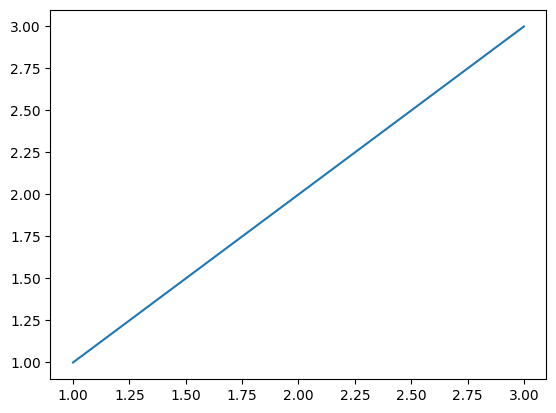

In [20]:
x = [1,2,3]
y = [1,2,3]
plt.plot(x,y)
plt.show()

In [21]:
sample_data = pd.read_csv('data_to_use.txt', header=None, names=["Column1","Column2"])

numInstances = len(sample_data)
numSample = 85
numTest = numInstances - numSample
w = 0
b = 0

x_train = sample_data.Column1[:-numTest]
x_test = sample_data.Column1[:-numSample]
y_train = sample_data.Column2[:-numTest]
y_test = sample_data.Column2[:-numSample]
    


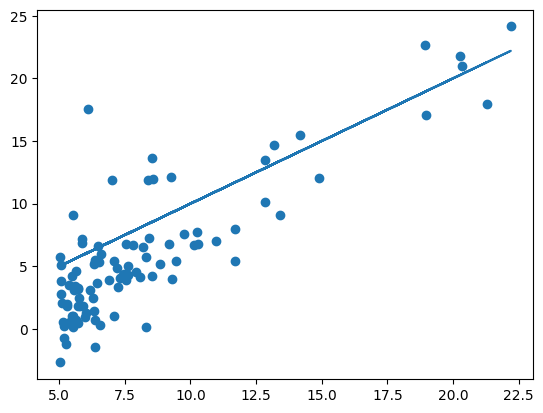

In [22]:
def compute_y(x,w,b):
    y = w*x + b
    return y

y = compute_y(sample_data.Column1, 1, 0)
plt.plot(sample_data.Column1, y)
plt.scatter(sample_data.Column1, sample_data.Column2)
plt.show()




7.445855542929897
Iteration    0: Cost 1.68e+01  dj_dw: -6.533e+01, dj_db: -5.839e+00   w:  1.307e+00, b: 1.16783e-01
Iteration 1500: Cost 4.48e+00  dj_dw: -3.195e-04, dj_db:  3.180e-03   w:  1.191e+00, b:-3.87820e+00
Iteration 3000: Cost 4.48e+00  dj_dw: -1.418e-06, dj_db:  1.411e-05   w:  1.193e+00, b:-3.89570e+00
Iteration 4500: Cost 4.48e+00  dj_dw: -6.293e-09, dj_db:  6.264e-08   w:  1.193e+00, b:-3.89578e+00
Iteration 6000: Cost 4.48e+00  dj_dw: -2.794e-11, dj_db:  2.780e-10   w:  1.193e+00, b:-3.89578e+00
Iteration 7500: Cost 4.48e+00  dj_dw: -1.403e-13, dj_db:  1.233e-12   w:  1.193e+00, b:-3.89578e+00
Iteration 9000: Cost 4.48e+00  dj_dw: -5.164e-15, dj_db:  1.101e-14   w:  1.193e+00, b:-3.89578e+00
Iteration 10500: Cost 4.48e+00  dj_dw: -5.164e-15, dj_db:  1.101e-14   w:  1.193e+00, b:-3.89578e+00
Iteration 12000: Cost 4.48e+00  dj_dw: -5.164e-15, dj_db:  1.101e-14   w:  1.193e+00, b:-3.89578e+00
Iteration 13500: Cost 4.48e+00  dj_dw: -5.164e-15, dj_db:  1.101e-14   w:  1.193

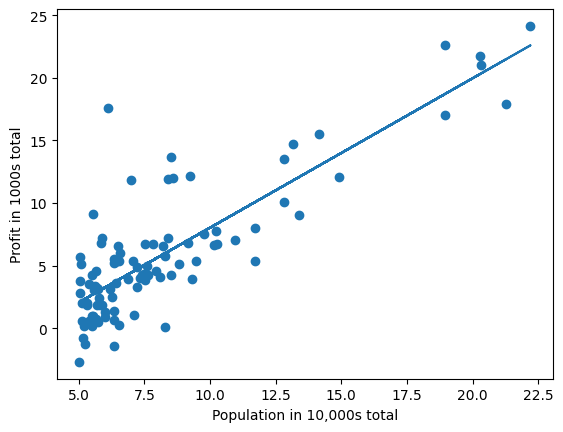

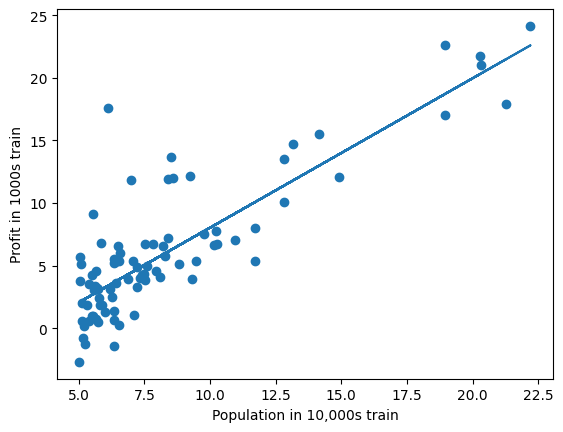

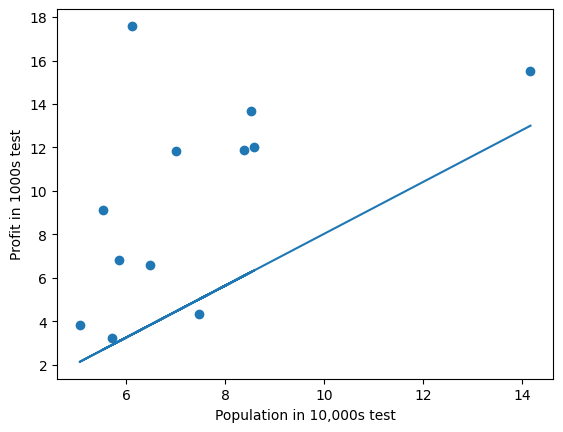

Profit when population is 35,000 is predicted to be: 0.27983687635176313
Profit when population is 70,000 is predicted to be: 4.455200000000001


In [23]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost


cost = compute_cost(sample_data.Column1, sample_data.Column2, 1, 0)
print(cost)

def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db


from copy import deepcopy
import math
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 15000
tmp_alpha = 0.02
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(sample_data.Column1 , sample_data.Column2, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

best_fit = compute_y(sample_data.Column1, 1.1930, -3.8958)
plt.plot(sample_data.Column1, best_fit)
plt.scatter(sample_data.Column1, sample_data.Column2)
plt.xlabel("Population in 10,000s total")
plt.ylabel("Profit in 1000s total")
plt.show()

best_fit = compute_y(x_train, 1.1930, -3.8958)
plt.plot(x_train, best_fit)
plt.scatter(x_train, y_train)
plt.xlabel("Population in 10,000s train")
plt.ylabel("Profit in 1000s train")
plt.show()

best_fit = compute_y(x_test, 1.1930, -3.8958)
plt.plot(x_test, best_fit)
plt.scatter(x_test, y_test)
plt.xlabel("Population in 10,000s test")
plt.ylabel("Profit in 1000s test")
plt.show()

profit = compute_y(3.5, w_final, b_final)
print("Profit when population is 35,000 is predicted to be: " + str(profit))
profit = compute_y(7, 1.1930, -3.8958)
print("Profit when population is 70,000 is predicted to be: " + str(profit))


In [33]:
cost = compute_cost(sample_data.Column1, sample_data.Column2, 1, -3)
print(cost)

4.983860697569075
